In [18]:
# get one sample from the dataset
import numpy as np
from torch.utils.data import DataLoader
from torch.nn import functional as F

from dataset.mit_bih import ECGMITBIHDataset
from dataset.code_15 import ECGCODE15Dataset

class DatasetArgs:  
    def __init__(self):
        self.data_folder_code15 = '/media/Volume/data/CODE15/nkclean_360_12l'
        self.labels_file_code15 = '/media/Volume/data/CODE15/exams.csv'
        self.data_folder_mit = '/media/Volume/data/MIT-BHI/data/'
        self.use_tab_data = False
        self.patch_size = 128
        self.normalize = True
        self.random_shift = False
        self.oversample=False
        self.nk_clean=True
        self.leads = ['*']

# dataset = ECGCODE15Dataset(DatasetArgs(), leads_to_use=['*'])

In [19]:
dataset_mit = ECGMITBIHDataset(DatasetArgs(), use_labels_in_tab_data=False)
print(dataset_mit[0].keys())

/home/luna97/Research/MIT-BIH_ecg_arrhytmia/dataset/mit_bih.py:36: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  self.samples = pd.read_csv(os.path.join(self.data_folder, name, f'labels_{subset}.csv'))


   patient  sample_id orig_label label  hb_start  hb_end  r_peak  \
0      101          0          N     N         0     209      83   
1      101          1          N     N       209     528     396   
2      101          2          N     N       528     839     711   
3      101          3          N     N       839    1168    1032   
4      101          4          N     N      1168    1503    1368   

   is_oversampled  win_start  win_end  age  is_male extra_annotations  \
0           False          0     1883   75    False                     
1           False          0     2196   75    False                     
2           False          0     2511   75    False                     
3           False          0     2832   75    False                     
4           False          0     3168   75    False                     

   r_peaks_interval_mean  r_peak_variance  
0               0.905000         0.033766  
1               0.904167         0.030880  
2               0.89

In [14]:
from tqdm import tqdm

train = [101, 106, 108, 109, 112, 114, 115, 116, 118, 119, 122, 124, 201, 203, 205, 207, 208, 209, 215, 220, 223, 230]

patients = { p: [0, 0, 0, 0, 0] for p in train }

for d in tqdm(dataset_mit):
   arr = patients[d['patient_id']] 
   arr[d['label']] += 1

print(patients)

100%|██████████| 51021/51021 [02:22<00:00, 358.05it/s]

{101: [1860, 3, 0, 0, 2], 106: [1507, 0, 520, 0, 0], 108: [1740, 4, 17, 2, 0], 109: [2492, 0, 38, 2, 0], 112: [2537, 2, 0, 0, 0], 114: [1820, 12, 43, 4, 0], 115: [1953, 0, 0, 0, 0], 116: [2302, 1, 109, 0, 0], 118: [2166, 96, 16, 0, 0], 119: [1543, 0, 444, 0, 0], 122: [2476, 0, 0, 0, 0], 124: [1536, 31, 47, 5, 0], 201: [1635, 128, 198, 2, 0], 203: [2529, 2, 444, 1, 4], 205: [2571, 3, 71, 11, 0], 207: [1543, 107, 210, 0, 0], 208: [1586, 2, 992, 373, 2], 209: [2621, 383, 1, 0, 0], 215: [3195, 3, 164, 1, 0], 220: [1954, 94, 0, 0, 0], 223: [2045, 73, 473, 14, 0], 230: [2255, 0, 1, 0, 0]}


In [20]:
from utils.utils import get_training_class_weights

weights = get_training_class_weights(dataset_mit, do_not_consider_classes=[4])


Class Counts: Counter({0: 45866, 2: 3788, 1: 944, 3: 415})
Class Weights: tensor([ 0.2781, 13.5098,  3.3668, 30.7307])


In [3]:
import pandas as pd

pd.read_csv('/media/Volume/data/CODE15/exams.csv').head()

,Unnamed: 0,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file,r_peaks,r_peak_interval_mean,r_peak_variance
0,0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5,[ 57 285 507 742 972 1196 1419 1630 1848 ...,0.625309,0.020557
1,1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5,[ 219 460 702 944 1176 1404 1631 1859 2080],0.646181,0.020969
2,2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5,[ 220 532 716 1024 1200 1599 1874],0.765741,0.214907
3,3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5,[ 306 585 868 1142 1434 1725 2004 2290 2595 ...,0.795679,0.024149
4,4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5,[ 115 285 454 623 793 962 1132 1303 1474 ...,0.473090,0.002729


signal shape torch.Size([2112, 12])
jittered signal shape torch.Size([2112, 12])
ft signal shape torch.Size([2112, 12])
frequency shifted signal shape torch.Size([2112, 12])


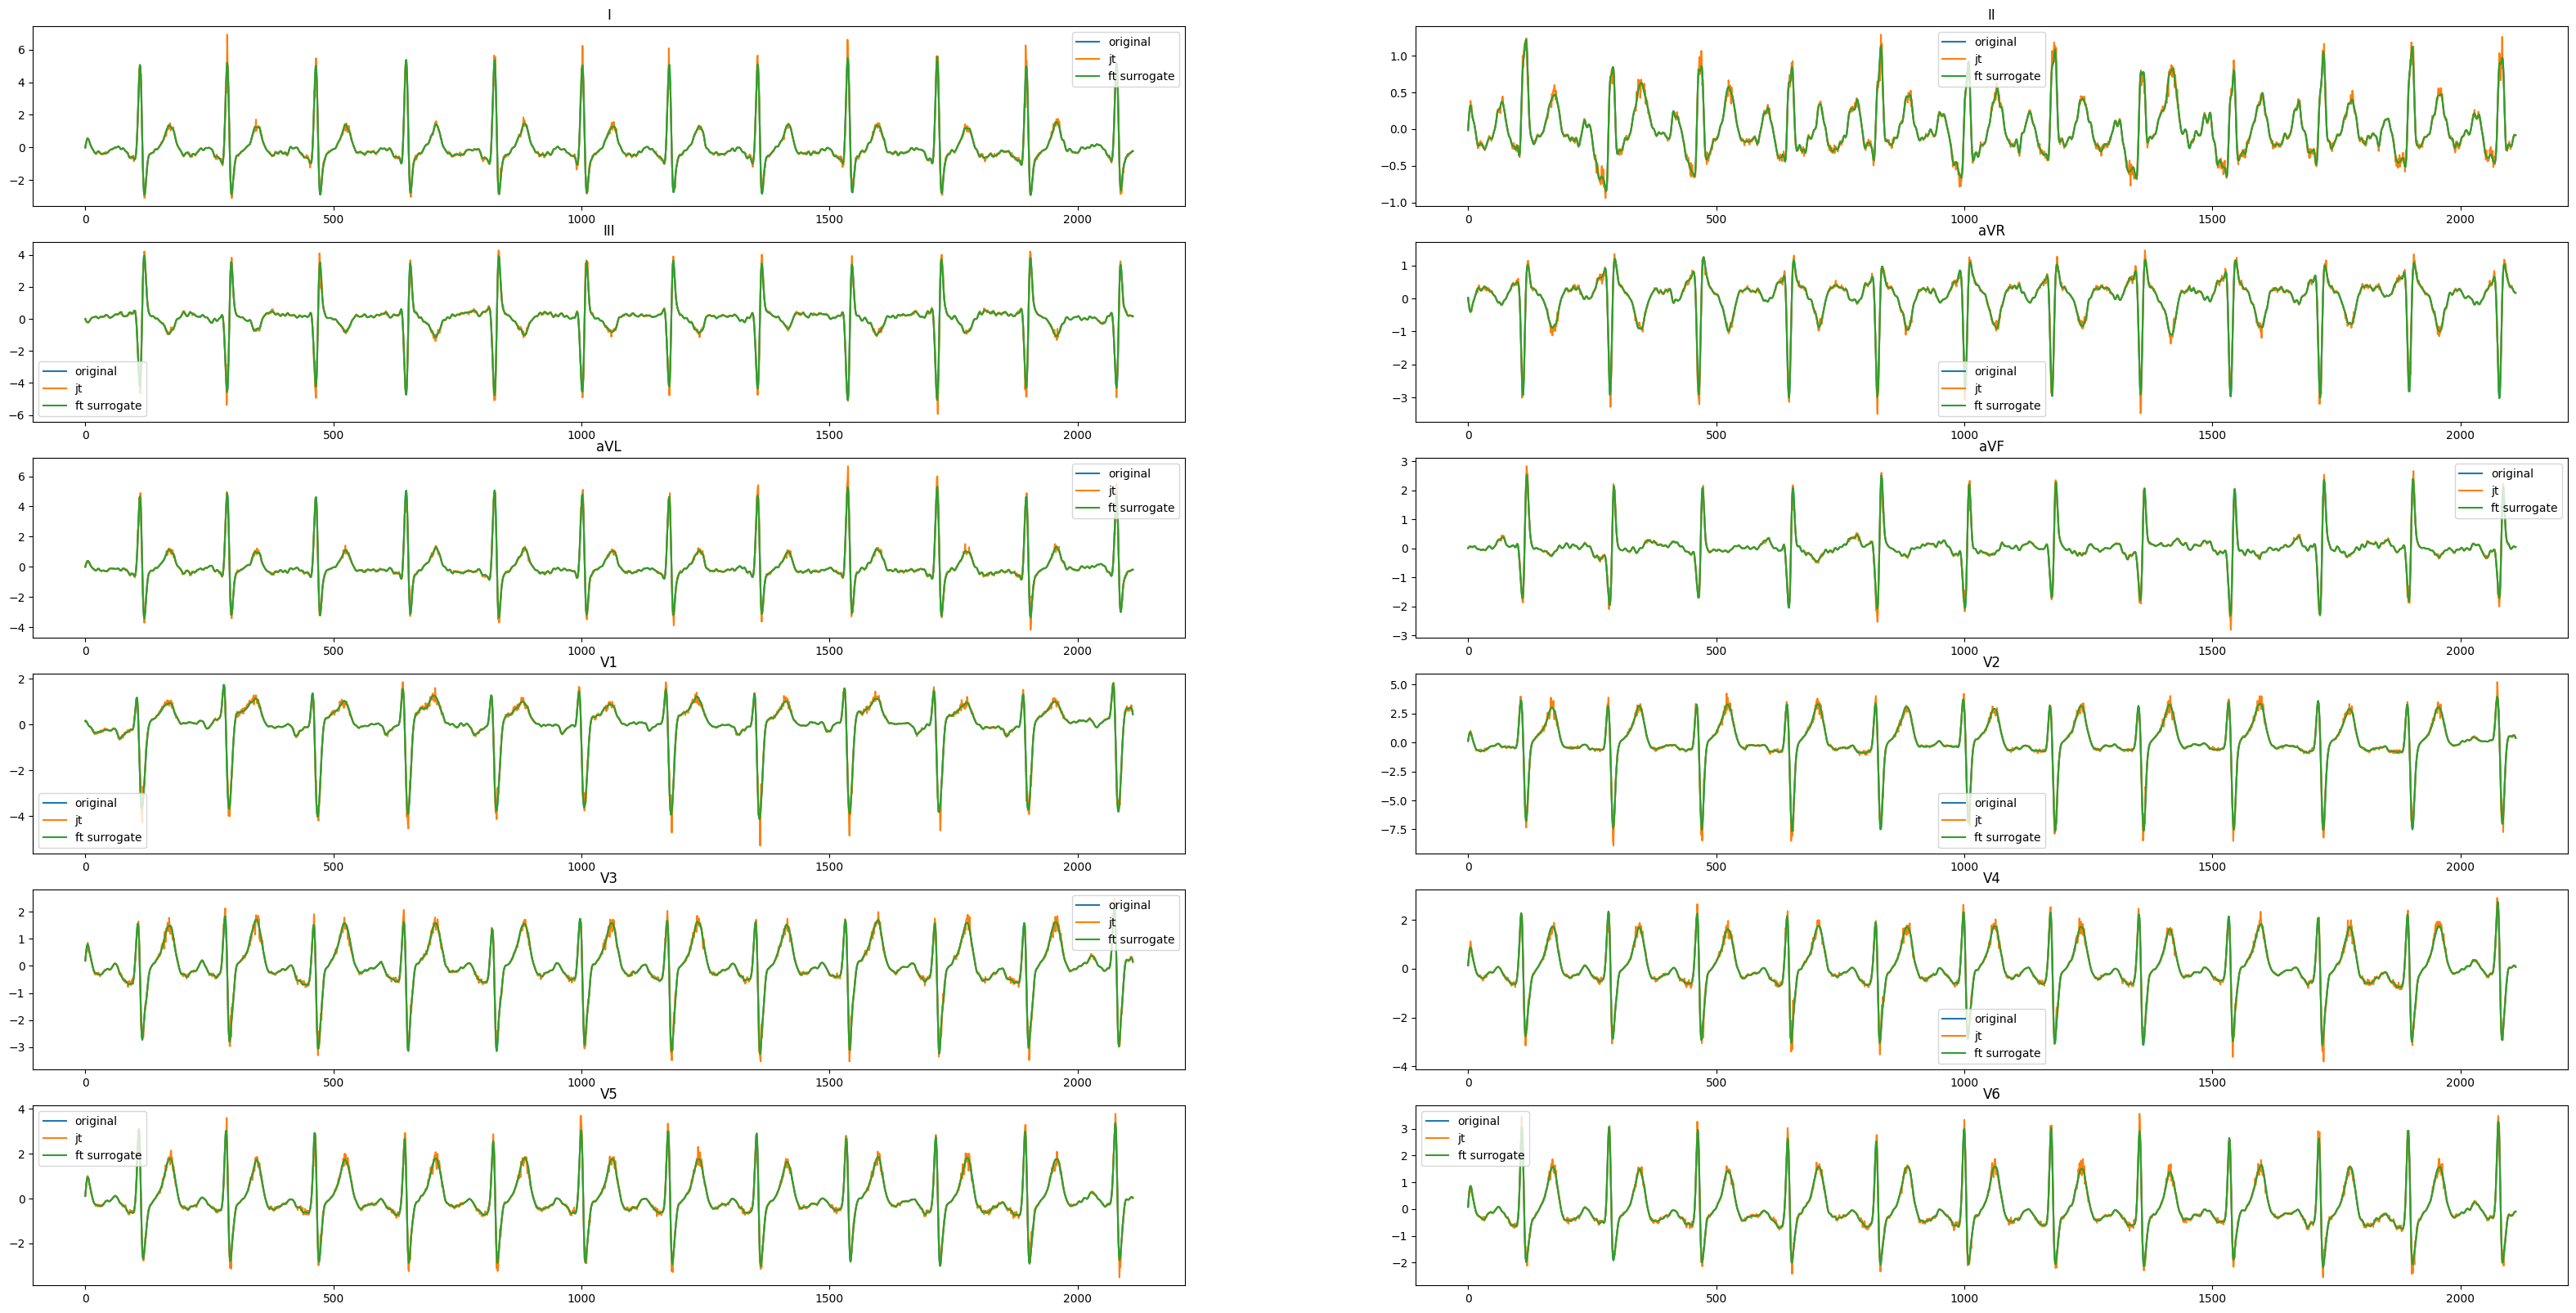

In [17]:
# plot the 12 lead signal
from augmentations import Jitter, FTSurrogate, SpecAugment, CropResizing, FrequencyShift

signal = dataset[89789]['signal']
leads = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
jt = Jitter(sigma=0.2)
jt_signal = jt(signal.unsqueeze(0)).squeeze()
ft_surrogate = FTSurrogate(0.5, channel_indep=False, prob=0.1)
ft_signal = ft_surrogate(signal.unsqueeze(0)).squeeze() 
fs = FrequencyShift(1)
fs_signal = fs(signal)

# cp = CropResizing(0.9, 0.9)
# cp_signal = cp(signal)

print('signal shape', signal.shape)
print('jittered signal shape', jt_signal.shape)
print('ft signal shape', ft_signal.shape)
# print('crop resized signal shape', cp_signal.shape)
print('frequency shifted signal shape', fs_signal.shape)

import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(6, 2, figsize=(40, 20))

for i in range(12):
    ax = axs[i//2, i%2]
    ax.plot(signal[:, i])
    ax.plot(jt_signal[:, i])
    ax.plot(ft_signal[:, i])
    # ax.plot(cp_signal[:, i])
    # ax.plot(fs_signal[:, i])

    ax.set_title(leads[i])

    ax.legend(['original', 'jt', 'ft surrogate',])

    



In [ ]:
# plot the gradient of a ssignal

sample = dataset[0]
shift_x, shift_reconstruct = get_reconstruction(sample, xlstm, patch_size)
print(shift_x.shape)
gradient = shift_x[:, :-1] - shift_x[:, 1:]
gradient_reconstruct = shift_reconstruct[:, :-1] - shift_reconstruct[:, 1:]
mse_grad = F.mse_loss(gradient, gradient_reconstruct, reduction='none')


fig = plt.figure(figsize=(20, 5))
plt.plot(gradient.cpu().squeeze().numpy(), color=color_1)
plt.plot(gradient_reconstruct.cpu().squeeze().numpy(), color=color_2)
plt.plot(mse_grad.cpu().squeeze().numpy(), color='green')
plt.legend(['Original', 'Reconstructed', 'MSE'])
#plt.plot(shift_x[:, :].cpu().squeeze().numpy(), color=color_2)
plt.show()

fig = plt.figure(figsize=(20, 5))
plt.plot(shift_x[:, :].cpu().squeeze().numpy(), color=color_2)
plt.plot(shift_reconstruct[:, :].cpu().squeeze().numpy(), color=color_1)
plt.legend(['Original', 'Reconstructed'])
plt.show()


NameError: name 'shift_x' is not defined

sample shape torch.Size([1, 3712, 1])
prediction_tokens shape torch.Size([1, 2560])
predictions shape torch.Size([2560])


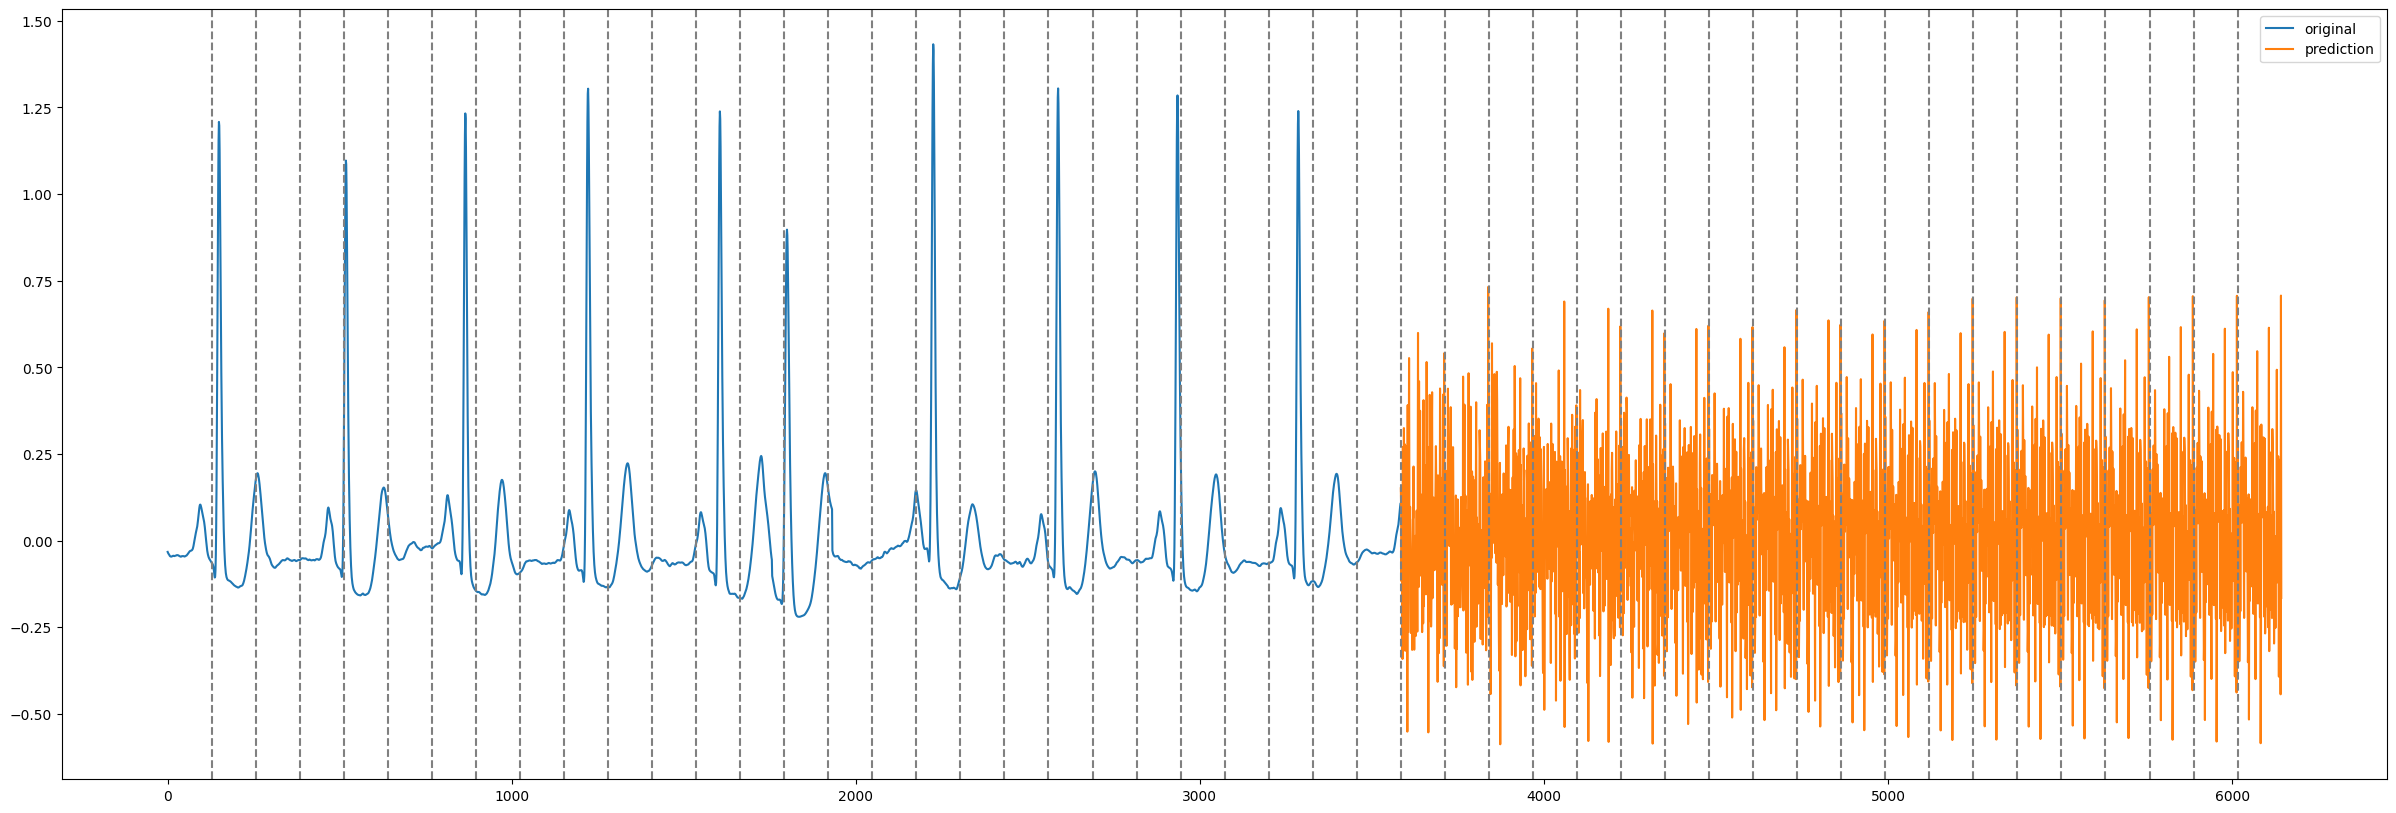

In [8]:
# given the sample predict a new signal

# get the prediction
#sample = sample[:, :600]
print('sample shape', sample.shape)
prediction_tokens = torch.zeros([1, 0]).to('cuda')
for i in range(0, 20):
    if i == 0:
        new_sample = sample
    else:
        flatten_preds = prediction_tokens.view(1, -1)
        # print('flatten_preds shape', flatten_preds.shape)
        # print('sample shape', sample.shape)
        new_sample = torch.cat([sample, flatten_preds.unsqueeze(-1)], dim=1)
        # print('new_sample shape', new_sample.shape)
    # print('new_sample shape', new_sample.shape)
    r1, r2, r3, r4 = xlstm.reconstruct(new_sample, tab_data=tab_data)
    # print('reconstruct shape', reconstruct.shape)
    # the last token is the prediction
    p1 = r1[:, -patch_size:]
    p2 = r2[:, -patch_size:]
    p3 = r3[:, -patch_size:]
    p4 = r4[:, -patch_size:]
    # print('prediction shape', prediction.shape)
    # print('prediction_tokens shape', prediction_tokens.shape)
    # print('prediction shape', prediction.shape)
    # print('prediction_tokens shape', prediction_tokens.shape)
    prediction_tokens = torch.cat([prediction_tokens, p1], dim=1) #, p2, p3, p4], dim=1)

print('prediction_tokens shape', prediction_tokens.shape)
predictions = prediction_tokens.squeeze().view(-1)
print('predictions shape', predictions.shape)

# plot the signal
plt.figure(figsize=(30, 10))
plt.plot(sample[0, :-patch_size].squeeze().cpu().numpy(), label='original')
plt.plot(range(len(sample[0, :-patch_size]), len(sample[0, :-patch_size]) + len(predictions)), predictions.detach().cpu().numpy(), label='prediction')
# add a pipe avery 64 samples
for i in range(1, (len(sample[0]) + len(predictions)) // patch_size -1):
   plt.axvline(x=patch_size*i, color='gray', linestyle='--')
plt.legend()

In [ ]:
import dataset.code_15 as code_15
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt    
from tqdm import tqdm

train_dataset = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records_360', num_leads=12, random_shift=True, patch_size=64, normalize=False)
train_dataset_cleaned = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records_360_nkclean', num_leads=12, random_shift=True, patch_size=64, normalize=False)

loaded 343287 records
tabular data fields for CODE 15:  Index(['age', 'is_male', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF',
       'normal_ecg'],
      dtype='object')
loaded 343287 records
tabular data fields for CODE 15:  Index(['age', 'is_male', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF',
       'normal_ecg'],
      dtype='object')


low 1
high 605
middle 342681


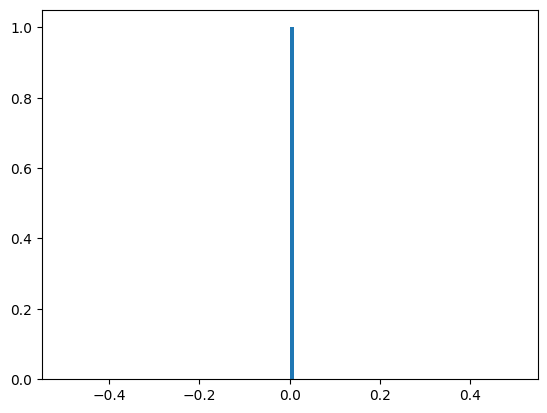

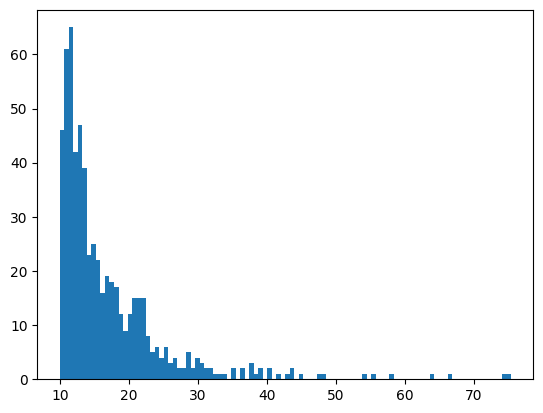

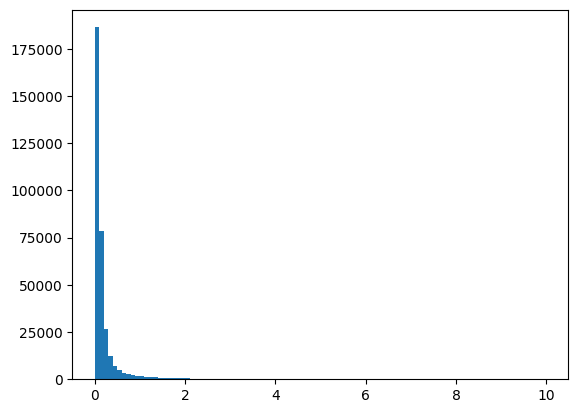

In [5]:
variances = [v[1] for v in vars]
low_variances = [v for v in variances if v < 0.0001]
print('low', len(low_variances))
hihg_variances = [v for v in variances if v > 10 ]
len(hihg_variances)
print('high', len(hihg_variances))
middle_variances = [v for v in variances if v > 0.0001 and v < 10]
len(middle_variances)
print('middle', len(middle_variances))

# plot the histogram of the signal length
plt.hist(low_variances, bins=100)
plt.show()
plt.hist(hihg_variances, bins=100)
plt.show()
plt.hist(middle_variances, bins=100)
plt.show()

number of samples 8
number of samples with high variance 0


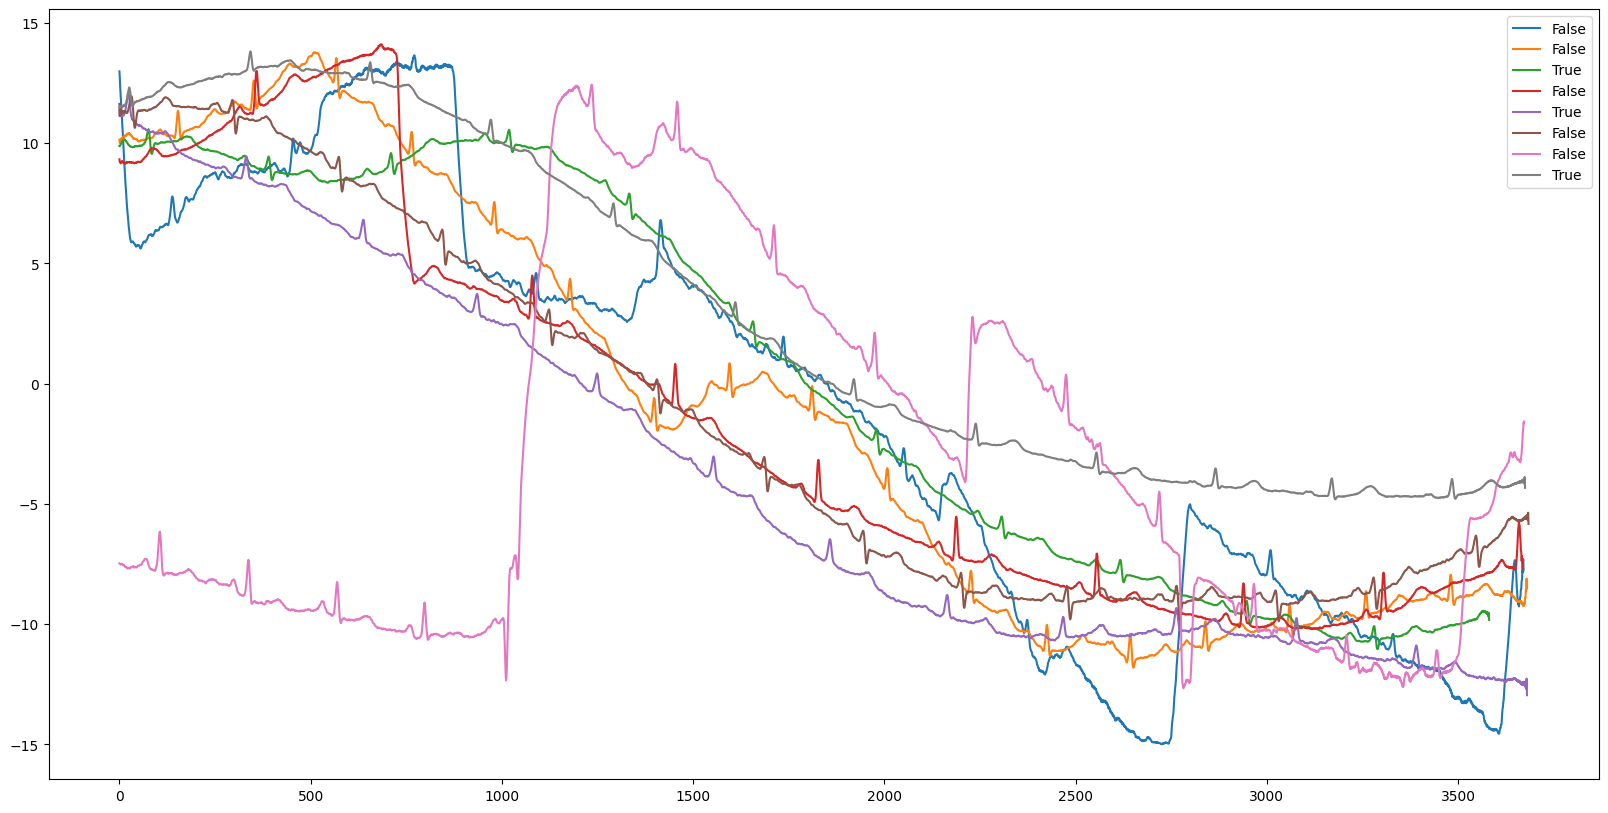

In [10]:
# get the index of the signal with highest variance
max_idx = sorted(vars, key=lambda x: x[1])
# plot the signal with the highest variance

# plot the first 10 samples
count = 0
plt.figure(figsize=(20, 10))
for i in range(1, len(max_idx)):
    sample = train_dataset[max_idx[-i][0]]['signal']
    # sample = (sample - sample.mean()) / sample.std()

    max_val = sample.max().item()
    min_val = sample.min().item()
    tab_data = train_dataset[max_idx[-i][0]]['tab_data']
    # if (max_val > 15 or min_val < -15):
    #print('tab_data', tab_data)
    plt.plot(train_dataset[max_idx[-i][0]]['signal'].squeeze().cpu().numpy(), label=f'{tab_data.loc["normal_ecg"].values[0]}')
    if max_idx[-i][1] < 50:
        break

print('number of samples', i)
print('number of samples with high variance', count)
plt.legend()
plt.show()

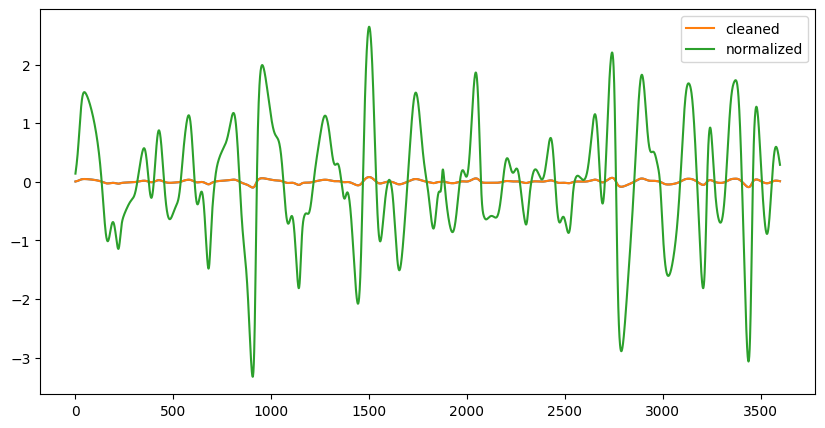

In [ ]:
from torch import nn    

class moving_avg(nn.Module):
    """
    Moving average block to highlight the trend of time series
    """
    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x


class series_decomp(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size):
        super(series_decomp, self).__init__()
        self.moving_avg = moving_avg(kernel_size, stride=1)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean
        return res, moving_mean
    

sd = series_decomp(25)


# plot the signal with the highest variance
sample = train_dataset[100]['signal']

plt.figure(figsize=(10, 5))
plt.plot(sample['signal'].squeeze().cpu().numpy())
plt.show()


In [ ]:
batch = next(iter(train_dataloader))

# plot the first sample
x = batch["signal"].to('cuda')
mask = batch["mask"].to('cuda')
tab_data = batch["tab_data"]
# print('initial mask shape', mask.shape)
# print('initial x shape', x.shape)
reconstruct, _, _, _ = xlstm.reconstruct(x, tab_data) 

# get rid of the exeding part on the original signal
shift_x = x[:, :reconstruct.shape[1]]
shift_x = shift_x[:, patch_size:].squeeze()

mask_shifted = mask[:, :reconstruct.shape[1]]
mask_shifted = mask_shifted[:, patch_size:].squeeze()

mask_idxs, lol = torch.where(mask_shifted == 0)
print('lol', lol.shape)

shift_reconstruct = reconstruct[:, :-patch_size]

#print('mask shape', mask.shape)
#print('x shape', x.shape)   
#print('reconstruct shape', shift_reconstruct.shape)

# shift_reconstruct = shift_reconstruct.masked_fill(mask_shifted, 0)
# shift_x = shift_x.masked_fill(mask_shifted, 0)

print('mask_shifted shape', mask_shifted.shape)
print('shift_x shape', shift_x.shape)
print('max_idxs has shape', mask_idxs.shape)
print('max_idxs 0 is ', mask_idxs[0])
print('shift_reconstruct shape', shift_reconstruct.shape)
# add a pipe avery 64 samples

# m = shift_x == mask_idxs
# plot the first sample
plt.figure(figsize=(10, 5))
plt.plot(shift_x[0].squeeze().cpu().numpy(), label='original')
plt.plot(shift_reconstruct[0].squeeze().detach().cpu().numpy(), label='reconstructed')
ma_inp = shift_x[0] * mask_shifted[0]
print('ma_inp shape', ma_inp.shape)
plt.plot(ma_inp.cpu().numpy(), label='lol')
#plot mask
# plt.plot(mask_shifted[0].cpu().numpy(), label='mask')
plt.legend()

In [6]:
from matplotlib import pyplot as plt    
import dataset.code_15 as code_15

train_dataset = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records_360_nkclean', num_leads=12, random_shift=False, patch_size=64, normalize=True)
train_original = code_15.ECGCODE15Dataset('/media/Volume/data/CODE15/unlabeled_records', num_leads=12, random_shift=False, patch_size=64, normalize=False)

train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True, collate_fn=code_15.collate_fn)

# plot the first sample


loaded 343287 records
tabular data fields for CODE 15:  Index(['age', 'is_male', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF',
       'normal_ecg'],
      dtype='object')
loaded 345109 records
tabular data fields for CODE 15:  Index(['age', 'is_male', '1dAVb', 'RBBB', 'LBBB', 'SB', 'ST', 'AF',
       'normal_ecg'],
      dtype='object')


torch.Size([4096])


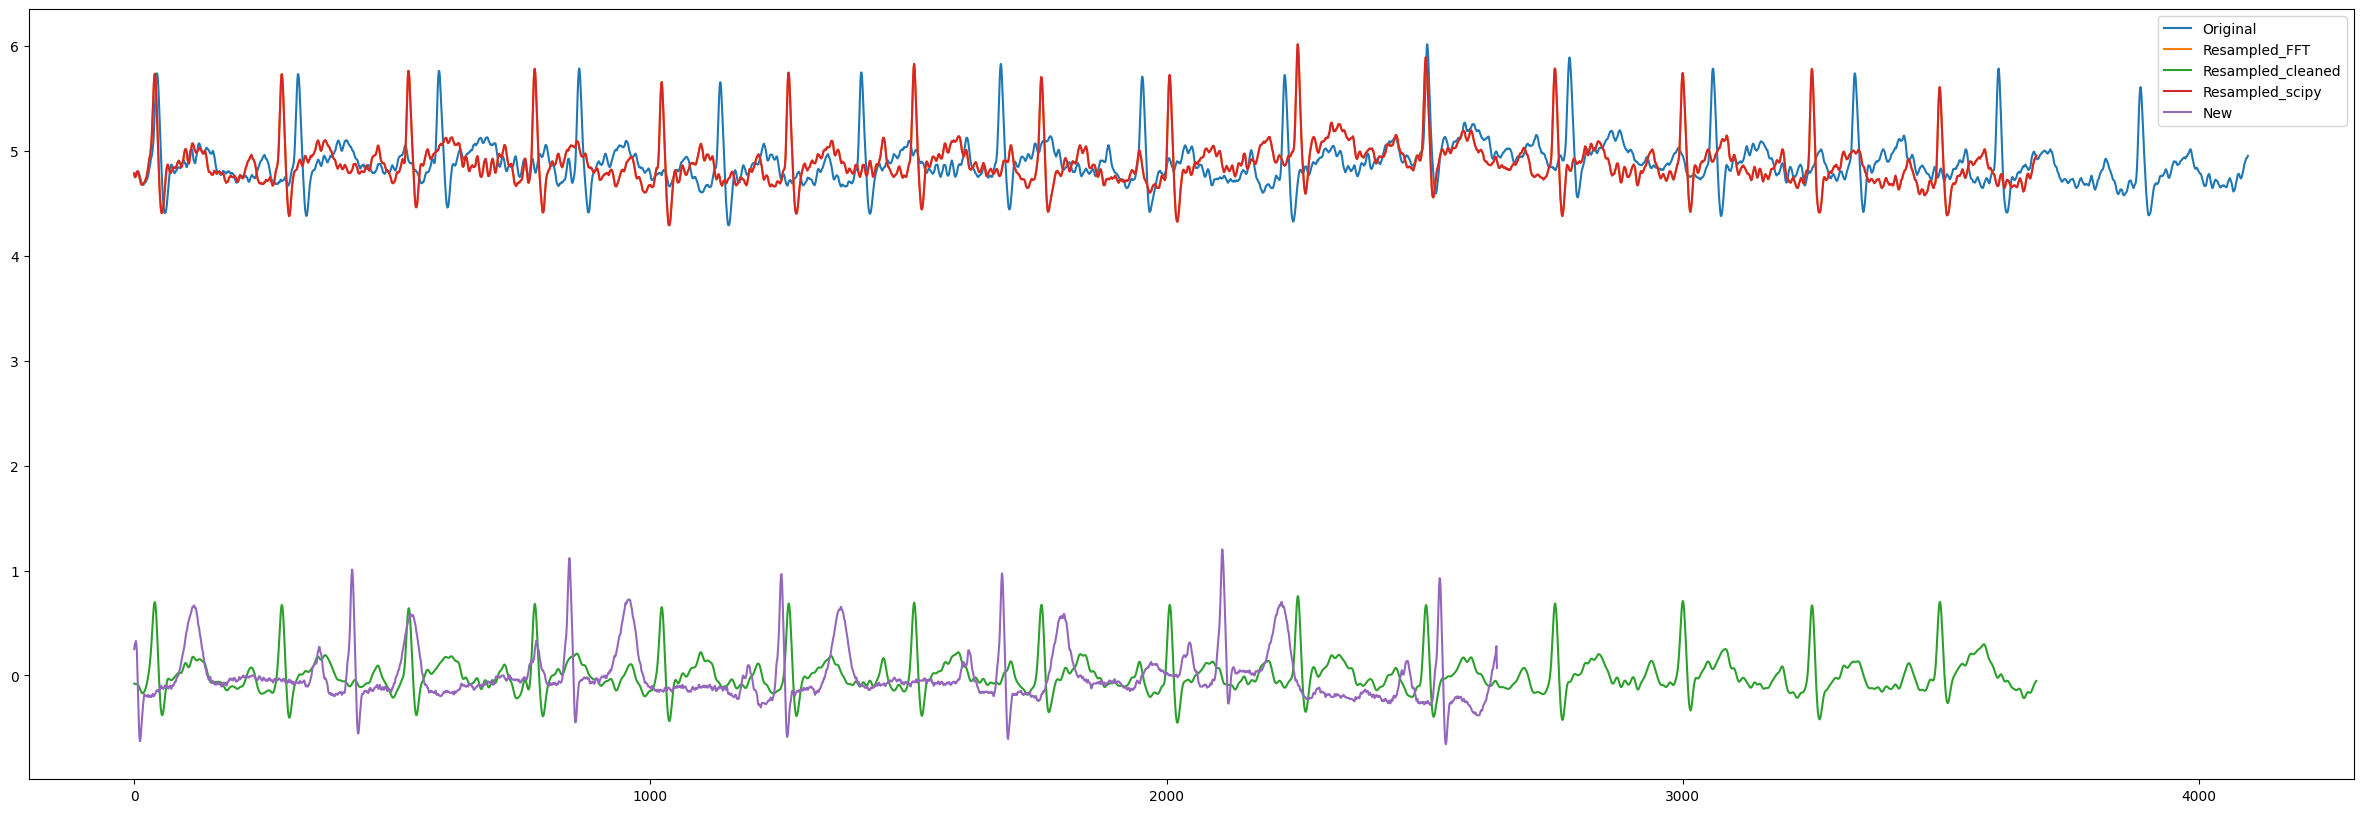

In [84]:
idx = 9878
sample_orig = train_original[idx]['signal'][:, 1]
sample_new = train_dataset[idx]['signal']
print(sample_orig.shape)
plt.figure(figsize=(30, 10))
plt.plot(sample_orig, label='Original')


resampled = nk.signal_resample(sample_orig, sampling_rate=400, desired_sampling_rate=360, method='FFT')
plt.plot(resampled, label='Resampled_FFT')
resampled = nk.signal_resample(sample_orig, sampling_rate=400, desired_sampling_rate=360, method='FFT')
resampled = nk.ecg_clean(resampled, sampling_rate=360, method='nk')
plt.plot(resampled, label='Resampled_cleaned')
#scipy resample
from scipy.signal import resample
resampled = resample(sample_orig, len(sample_orig) * 360 // 400)
plt.plot(resampled, label='Resampled_scipy')

plt.plot(sample_new, label='New')   

plt.legend()


torch.Size([3686])
torch.Size([10, 3686])
torch.Size([10, 3686])


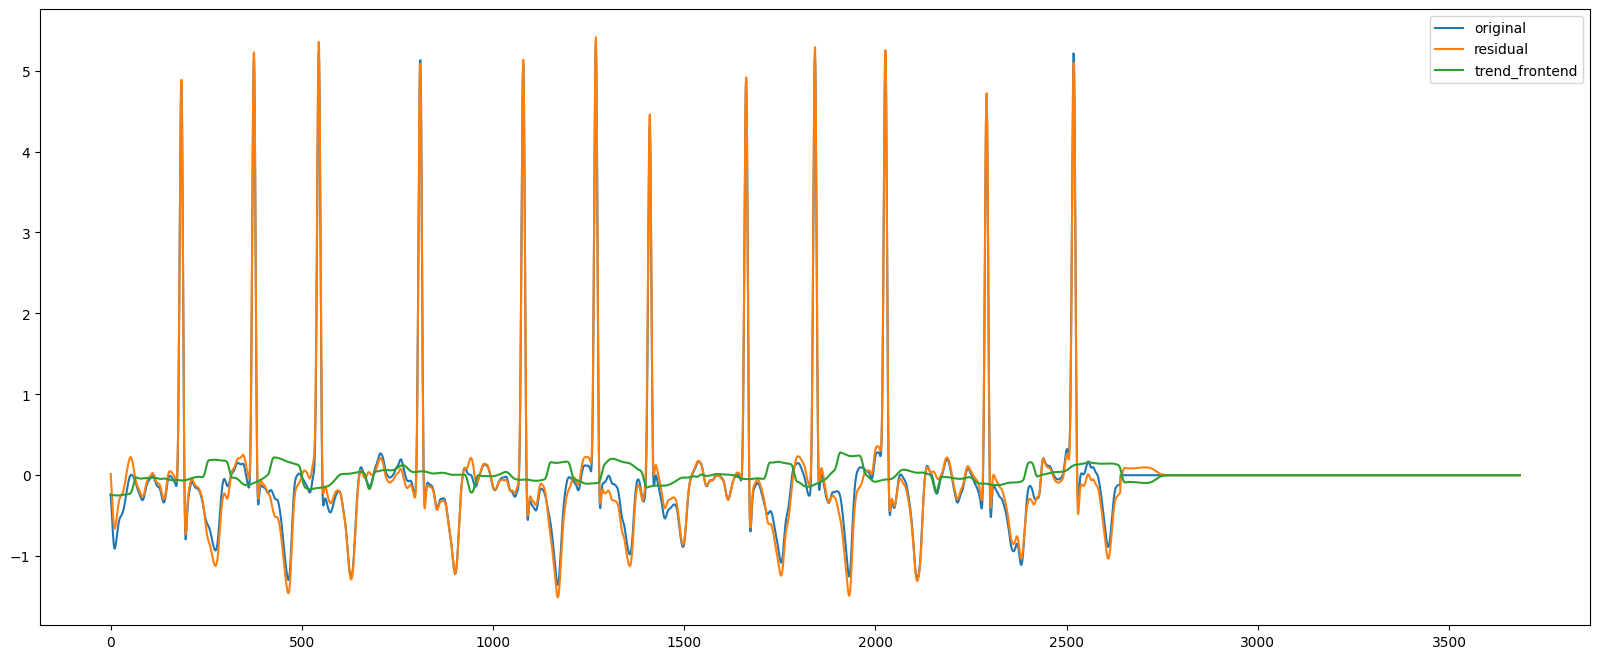

In [20]:
from torch import nn
class MovingAvg(nn.Module):
    def __init__(self, moving_avg, front_end):
        super(MovingAvg, self).__init__()
        self.kernel_size = moving_avg
        self.avg = nn.AvgPool1d(kernel_size=moving_avg, stride=1, padding=0)
        self.front_end = front_end

    def forward(self, x):
        # padding on the both ends of time series
        if not self.front_end:
            front = x[:, 0:1, :].repeat(1, self.kernel_size-1, 1)
            x = torch.cat([front, x], dim=1)

        else:
            front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
            end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
            x = torch.cat([front, x, end], dim=1)

        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x        
    

class SeriesDecomposition(nn.Module):
    """
    Series decomposition block
    """
    def __init__(self, kernel_size, front_end):
        super(SeriesDecomposition, self).__init__()
        self.moving_avg = MovingAvg(kernel_size, front_end)

    def forward(self, x):
        moving_mean = self.moving_avg(x)
        res = x - moving_mean
        return res, moving_mean
    
sd = SeriesDecomposition(251, front_end=True)
    
sample = next(iter(train_dataloader))

decomposed = sd(sample['signal'])

#fft = torch.fft(sample['signal'], dim=1)

print(sample['signal'][0].squeeze().shape)
print(decomposed[0].squeeze().shape)
print(decomposed[1].squeeze().shape)

# plot the first sample
plt.figure(figsize=(20, 8))
plt.plot(sample['signal'][0].squeeze().cpu().numpy(), label='original')
plt.plot(decomposed[0][0].squeeze().cpu().numpy(), label='residual')
plt.plot(decomposed[1][0].squeeze().cpu().numpy(), label='trend_frontend')
# plt.plot(sd_f(sample['signal'])[0][0].squeeze().cpu().numpy(), label='trend_actual')
plt.legend()
plt.show()





/home/luna97/Research/MIT-BIH_ecg_arrhytmia/mit_bih_env/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
/home/luna97/Research/MIT-BIH_ecg_arrhytmia/mit_bih_env/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your u

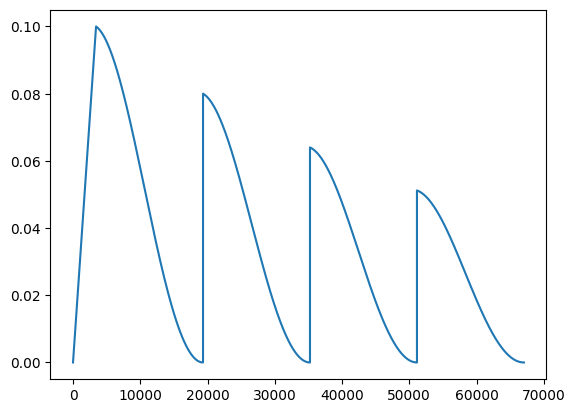

In [ ]:
from torch.optim.lr_scheduler import LambdaLR
import math
import torch
import torch.optim as optim
from matplotlib import pyplot as plt


def get_cosine_with_hard_restarts_schedule_with_warmup_and_decay(
    optimizer, 
    num_warmup_steps, 
    num_training_steps, 
    num_cycles=1, 
    decay_factor=0.9
):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return current_step / max(1, num_warmup_steps)
        
        progress = (current_step - num_warmup_steps) / max(1, num_training_steps - num_warmup_steps)
        cycle_progress = progress * num_cycles % 1  # Progress within the current cycle
        decay = decay_factor ** (progress * num_cycles)  # Apply decay per cycle

        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * cycle_progress))) * decay
    
    return LambdaLR(optimizer, lr_lambda)

model = torch.nn.Linear(10, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)
steps_per_epoch = 2682
epochs = 25
train_steps = steps_per_epoch * epochs
warmup_steps = steps_per_epoch  * 2

lr_scheduler = get_cosine_with_hard_restarts_schedule_with_warmup_and_decay(
    optimizer, 
    num_warmup_steps=warmup_steps, 
    num_training_steps=train_steps, 
    num_cycles=(train_steps // warmup_steps) // 4, decay_factor=0.8)

lrs = []
for epoch in range(train_steps):
    # train step goes here
    lr_scheduler.step(epoch)
    lrs.append(optimizer.param_groups[0]['lr'])

plt.plot(lrs)

In [ ]:
from torch.optim.lr_scheduler import LambdaLR
import math

def get_cosine_with_hard_restarts_schedule_with_warmup_and_decay(
    optimizer, 
    num_warmup_steps, 
    num_training_steps, 
    num_cycles=1, 
    decay_factor=0.9
):
    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return current_step / max(1, num_warmup_steps)
        
        progress = (current_step - num_warmup_steps) / max(1, num_training_steps - num_warmup_steps)
        cycle_progress = progress * num_cycles % 1  # Progress within the current cycle
        decay = decay_factor ** (progress * num_cycles)  # Apply decay per cycle

        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * cycle_progress))) * decay
    
    return LambdaLR(optimizer, lr_lambda)


   age  is_male
0   64     True
0   83     True
0   84    False
0    0     True
0   84    False
0    0     True
0   61     True
0   83    False
0   89     True
0   76    False
0   89     True
0   84    False
0   84    False
0   83    False
0   32    False
0   69     True
0    0     True
0    0     True
0   24    False
0   80    False
0   89     True
0   83     True
0   73    False
0   84    False
0   89     True
0   57     True
0   89     True
0   63    False
0   80    False
0   61     True
0   83     True
0   57     True


In [1]:
from mlstm_kernels.torch import get_available_mlstm_step_kernels, get_available_mlstm_kernels, get_available_mlstm_sequence_kernels
get_available_mlstm_kernels(), get_available_mlstm_step_kernels(), get_available_mlstm_sequence_kernels()

(['chunkwise--native_autograd',
  'chunkwise--native_custbw',
  'chunkwise--triton_limit_chunk',
  'chunkwise--triton_xl_chunk',
  'parallel--native_autograd',
  'parallel--native_custbw',
  'parallel--native_stablef_autograd',
  'parallel--native_stablef_custbw',
  'parallel--triton_limit_headdim'],
 ['native', 'triton'],
 ['native_sequence__native', 'native_sequence__triton'])